## 非ユニタリー系

### 時間発展

散乱問題等で吸収の効果，すなわち特定の領域に存在している波動関数の存在確率を減衰(もしくはゼロ)にしたいと考える場合がある．


簡単のため $0<q<0.2$の領域に到達した波動関数の存在確率をゼロにする作用素$\hat{P}$を考える．
つまり
$$
\hat{P} = \begin{cases}
0, \quad (0<q<0.2)\\
1, \quad (\text{else})
\end{cases}
$$
として，$\hat{U}^{(o)}=\hat{P}\hat{U}$による時間発展を考える． S

In [1]:
# ipython notebookを使わない場合は次の命令は無視して下さい
%matplotlib inline

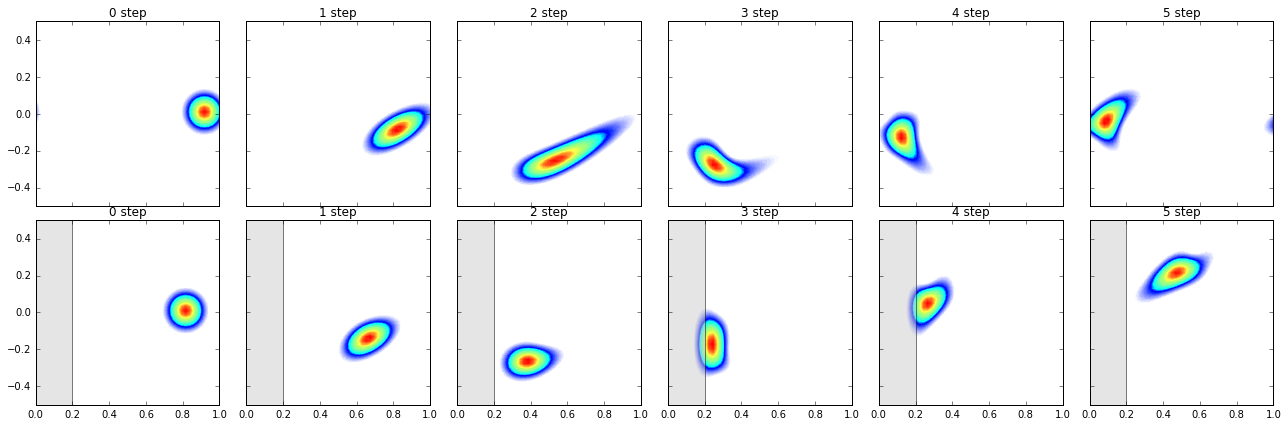

In [2]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

dim = 50
k = 1
qmin, qmax = 0, 1
pmin, pmax = -0.5,0.5

tmax = 6
cmap = sq.StandardMap(k=k)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = sq.Qmap(cmap, dim, domain) # defines the quantum system
state = qmap.getState().cs(0.9,0.0) 
qmap.setInit(state) # set intial condition

fig, axs = plt.subplots(2,6,figsize=(6*3,3*2),sharex=True,sharey=True)

## ---- closed system ----
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    axs[0][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
    axs[0][i].set_title("%d step" % i)

    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>

## ------ open system -------
state = qmap.getState().cs(0.8,0.0) 
qmap.setInit(state) # set intial condition

abs_border = 0.2
abs_index = state.x[0] < abs_border
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    axs[1][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
    axs[1][i].set_title("%d step" % i)
    axs[1][i].axvspan(0, abs_border, facecolor='0.8', alpha=0.5)
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>
    state = qmap.getOut() # return | phi_1>
    state[abs_index] = 0
    qmap.setInit(state)
    
fig.tight_layout(h_pad=0)
plt.show()

吸収によって波動関数のノルムが1より小さくなっていくことに注意して下さい．
上記例題では定義していませんが，$q$ -表示の吸収ポテンシャルは階段関数です．陽的に定義すると．

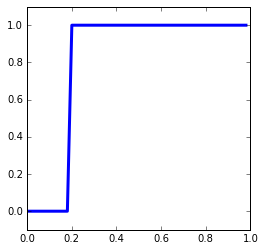

In [3]:
def step_abs(x,border):
    return np.array([0 if xx < border else 1 for xx in x])

absfunc = step_abs(state.x[0], abs_border)
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(state.x[0],absfunc,"-",lw=3)
ax.set_ylim(-0.1,1.1)
plt.show()

波動は微分が不連続である点に触れると回折が生じるため，吸収をなめらかに行いたいと思う事も有る用のような場合は以下の様に自作すれば良い．
尚 吸収作用素は$0\le P \le1$に取らなければならない．

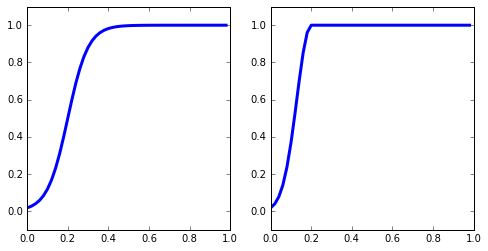

In [4]:
def tanh_abs(x,x_c,beta):
    xx = beta*(x-x_c)
    return (np.tanh(xx)+1)/2

def exp_abs(x, x_c,beta,alpha):
    x1 = (x - x_c)
    x2 = (x - 10)
    theta0= (1- np.tanh(x1*beta))/2
    theta1= (1 + np.tanh(x2*beta))/2
    w = (x1**2*theta0 +x2**2*theta1)
    p = np.exp(-w/alpha)
    return p

fig, axs = plt.subplots(1,2,figsize=(8,4))

abs_border = 0.2
smoothness = 10
absfunc = tanh_abs(state.x[0], abs_border,smoothness)
axs[0].plot(state.x[0],absfunc,"-",lw=3)
axs[0].set_ylim(-0.1,1.1)

abs_border = 0.2
beta,alpha = 200,0.01
absfunc = exp_abs(state.x[0], abs_border,beta, alpha)
axs[1].plot(state.x[0],absfunc,"-",lw=3)
axs[1].set_ylim(-0.1,1.1)

plt.show()

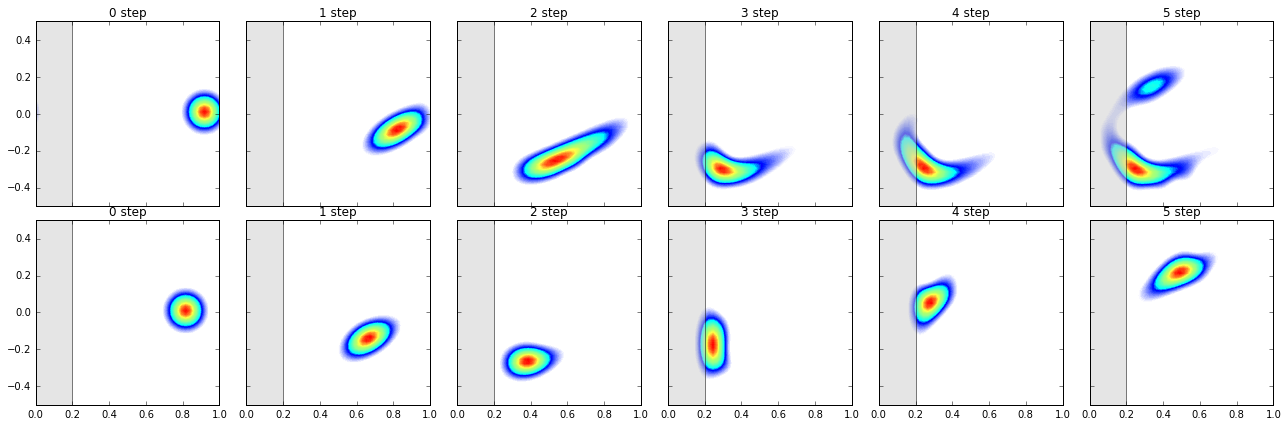

In [5]:
fig, axs = plt.subplots(2,6,figsize=(6*3,3*2),sharex=True,sharey=True)

# ---- tanh case ----

# -- soft absorber
state = qmap.getState().cs(0.9,0.0)
qmap.setInit(state) # set intial condition
abs_border = 0.2
beta = 10
absfunc = tanh_abs(state.x[0], abs_border,beta)
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    axs[0][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
    axs[0][i].set_title("%d step" % i)
    axs[0][i].axvspan(0, abs_border, facecolor='0.8', alpha=0.5)
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>
    state = qmap.getOut() # return | phi_1>
    state = absfunc*state
    qmap.setInit(state)

## -- sharp absorber

state = qmap.getState().cs(0.8,0.0)
qmap.setInit(state) # set intial condition
abs_border = 0.2
beta = 100
absfunc = tanh_abs(state.x[0], abs_border,beta)
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    axs[1][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
    axs[1][i].set_title("%d step" % i)
    axs[1][i].axvspan(0, abs_border, facecolor='0.8', alpha=0.5)
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>
    state = qmap.getOut() # return | phi_1>
    state = absfunc*state
    qmap.setInit(state)


fig.tight_layout(h_pad=0)
plt.show()

### Qmap の継承

ここまでくるともはやQmapを継承してevolve関数を上書きしたほうが良いかもしれない．

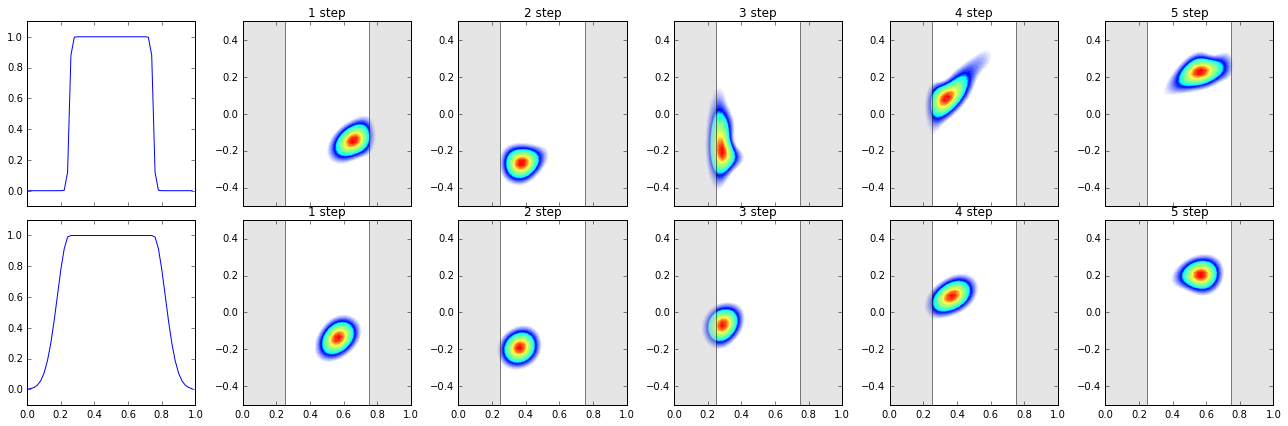

In [6]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

class OpenQmap(sq.Qmap):
    def set_absorber(self, absorber):
        self.absorber = absorber
    def operate(self):
        pvec = np.fft.fft(self.operator[0]*self.stateIn)
        qvec = np.fft.ifft(self.operator[1]*pvec)
        qvec = self.absorber*qvec
        self.stateOut = sq.State(self.scaleinfo, qvec)

def tanh_abs(x,x1,x2,beta):
    xx1 = (x-x1)*beta
    xx2 = (x-x2)*beta
    return (1+np.tanh(xx1))/2 - (1+ np.tanh(xx2))/2 

def exp_abs(x, x1,x2,alpha,beta):
    x1 = (x - x1)
    x2 = (x - x2)
    theta0= (1 - np.tanh(x1*beta))/2
    theta1= (1 + np.tanh(x2*beta))/2
    w = (x1**2*theta0 +x2**2*theta1)
    p = np.exp(-w/alpha)
    return p

dim = 50
k = 1
qmin, qmax = 0, 1
pmin, pmax = -0.5,0.5

tmax = 6
cmap = sq.StandardMap(k=k)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = OpenQmap(cmap, dim, domain) # defines the quantum system
state = qmap.getState().cs(0.8,0.0)
qmap.setInit(state) # set intial condition


## ---- tanh absorber  ----
fig, axs = plt.subplots(2,6,figsize=(6*3,3*2),sharex=True,sharey=False)

abs_x1= 0.25
abs_x2 = 0.75
beta=100
absfunc = tanh_abs(state.x[0], abs_x1, abs_x2, beta)
qmap.set_absorber(absfunc)
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    if i == 0:
        axs[0][i].plot(state.x[0], absfunc)
        axs[0][i].set_ylim(-0.1,1.1)
    else:
        axs[0][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
        axs[0][i].set_title("%d step" % i)
        axs[0][i].axvspan(0, abs_x1, facecolor='0.8', alpha=0.5)
        axs[0][i].axvspan(abs_x2,1, facecolor='0.8', alpha=0.5)

    qmap.evolve()

## ------ exp absorber  -------
state = qmap.getState().cs(0.7,0.0)
qmap.setInit(state) # set intial condition
beta,alpha = 200,0.01
absfunc = exp_abs(state.x[0], abs_x1,abs_x2, alpha,beta)
qmap.set_absorber(absfunc)
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()

    if i == 0:
        axs[1][i].plot(state.x[0], absfunc)
        axs[1][i].set_ylim(-0.1,1.1)
    else:
        axs[1][i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
        axs[1][i].set_title("%d step" % i)
        axs[1][i].axvspan(0, abs_x1, facecolor='0.8', alpha=0.5)
        axs[1][i].axvspan(abs_x2,1, facecolor='0.8', alpha=0.5)

    qmap.evolve()


fig.tight_layout(h_pad=0)
plt.show()

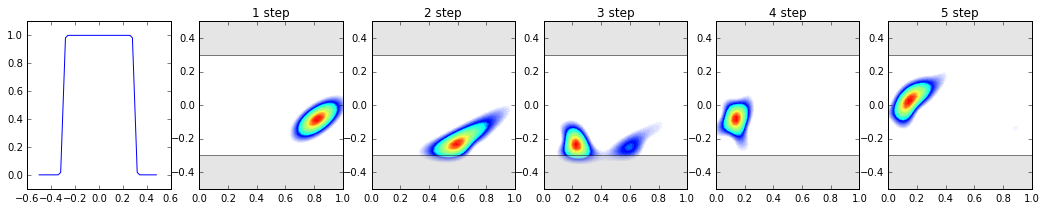

In [7]:
class OpenQmap(sq.Qmap):
    def set_absorber(self, absorber):
        self.absorber = sq.State(self.scaleinfo, absorber)
    def operate(self):
        pvec = np.fft.fft(self.operator[0]*self.stateIn)
        qvec = np.fft.ifft(self.operator[1]*pvec)
        qvec = sq.State(self.scaleinfo, qvec)
        pvec = self.absorber*qvec.q2p()
        qvec = pvec.p2q()
        self.stateOut = sq.State(self.scaleinfo, qvec)

dim = 50
k = 1
qmin, qmax = 0, 1
pmin, pmax = -0.5,0.5

tmax = 6
cmap = sq.StandardMap(k=k)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = OpenQmap(cmap, dim, domain) # defines the quantum system
state = qmap.getState().cs(0.9,0.0)
qmap.setInit(state) # set intial condition


## ---- tanh absorber  ----
fig, axs = plt.subplots(1,6,figsize=(6*3,3),sharex=False,sharey=False)

abs_x1= -0.3
abs_x2 = 0.3
beta=100
absfunc = tanh_abs(state.x[1], abs_x1, abs_x2, beta)
qmap.set_absorber(absfunc)
for i in range(0,tmax):
    state = qmap.getIn() # return | phi_0>
    x,y,z = state.hsmrep()
    if i == 0:
        axs[i].plot(state.x[1], absfunc)
        axs[i].set_ylim(-0.1,1.1)
    else:
        axs[i].contourf(x,y,z, 100, cmap=sq.utility.hsm_cmap)
        axs[i].set_title("%d step" % i)
        axs[i].axhspan(pmin, abs_x1, facecolor='0.8', alpha=0.5)
        axs[i].axhspan(abs_x2,pmax, facecolor='0.8', alpha=0.5)

    qmap.evolve()
plt.show()

### 固有状態

次に $\hat{U}^{(o)}$の固有値問題を考える． Qmap のoperatateを吸収作用素付きの時間発展を定義すればそのまま固有関数が求まる様になっている．

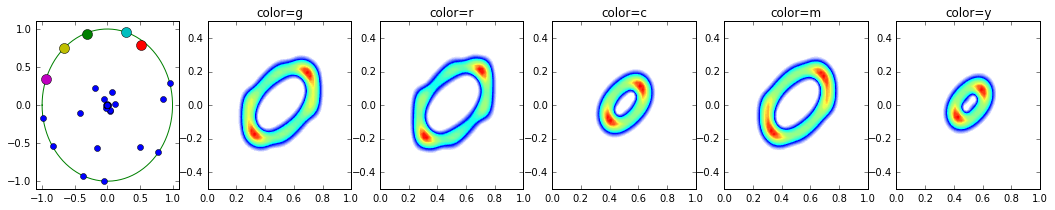

In [8]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

class OpenQmap(sq.Qmap):
    def set_absorber(self, absorber):
        self.absorber = absorber
    def operate(self):
        pvec = np.fft.fft(self.operator[0]*self.stateIn)
        qvec = np.fft.ifft(self.operator[1]*pvec)
        qvec = self.absorber*qvec
        self.stateOut = sq.State(self.scaleinfo, qvec)

def tanh_abs(x,x1,x2,beta):
    xx1 = (x-x1)*beta
    xx2 = (x-x2)*beta
    return (1+np.tanh(xx1))/2 - (1+ np.tanh(xx2))/2 

def exp_abs(x, x1,x2,alpha,beta):
    x1 = (x - x1)
    x2 = (x - x2)
    theta0= (1 - np.tanh(x1*beta))/2
    theta1= (1 + np.tanh(x2*beta))/2
    w = (x1**2*theta0 +x2**2*theta1)
    p = np.exp(-w/alpha)
    return p

dim = 70
k = 1
qmin, qmax = 0, 1
pmin, pmax = -0.5,0.5

cmap = sq.StandardMap(k=k)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = OpenQmap(cmap, dim, domain) # defines the quantum system
state = qmap.getState()
## ---- tanh absorber  ----
fig, axs = plt.subplots(1,6,figsize=(6*3,3))

abs_x1= 0.25
abs_x2 = 0.75
beta=100
absfunc = tanh_abs(state.x[0], abs_x1, abs_x2, beta)
qmap.set_absorber(absfunc)
evals, evecs = qmap.eigen()

theta = np.linspace(-np.pi,np.pi,100)
z = np.exp(1.j*theta)
axs[0].plot(z.real, z.imag, '-g')
axs[0].plot(evals.real,evals.imag, 'o')
axs[0].set_xlim(-1.1,1.1)
axs[0].set_ylim(-1.1,1.1)
for i, evec in enumerate(evecs):
    lx, = axs[0].plot(evals[i].real, evals[i].imag, 'o',markersize=10)
    x,y,z = evec.hsmrep()
    axs[i+1].contourf(x,y,z,100,cmap=sq.utility.hsm_cmap)
    axs[i+1].set_title("color=%s" % lx.get_color())
    if i >=4:
        break
plt.show()